In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
pos = []
vel = []
h = 103
w = 101
# h = 7
# w = 11
with open("d14_input") as f:
    for line in f:
        p, v = line[:-1].split(" ")
        px, py = p[2:].split(",")
        vx, vy = v[2:].split(",")
        pos.append([px, py])
        vel.append([vx, vy])
        
pos = np.array(pos, dtype=int)
vel = np.array(vel, dtype=int)

In [3]:
new_pos = (pos + 100 * vel) %[w, h]

ul = np.sum((new_pos[:, 0] < int(w/2)) *
          (new_pos[:, 1] < int(h/2)))

ur = np.sum((new_pos[:, 0] > (int(w/2))) *
          (new_pos[:, 1] < int(h/2)))

ll = np.sum((new_pos[:, 0] < int(w/2)) *
          (new_pos[:, 1] > (int(h/2))))

lr = np.sum((new_pos[:, 0] > (int(w/2))) *
          (new_pos[:, 1] > (int(h/2))))


print(ul * ur * ll * lr)

218965032


In [4]:
img = np.zeros((w,h))
for i in range(pos.shape[0]):
    img[pos[i, 0], pos[i, 1]] = 1

In [5]:
def check_contig(img):
    if not img[int(h/2), int(w/2)]: return False
    visited = np.zeros(img.shape)
    sum = np.sum(np.logical_xor(img, visited))
    if sum < 450: print(sum)
    if sum > 450: return False
    return True
    
def dfs(loc, img, visited):
    if not 0 <= loc[0] < w: return
    if not 0 <= loc[1] < h: return
    if not img[loc[0], [loc[1]]]: return
    if visited[loc[0], loc[1]]: return
    
    visited[loc[0], loc[1]] = 1
    
    dfs([loc[0]+1, loc[1]], img, visited)
    dfs([loc[0]-1, loc[1]], img, visited)
    dfs([loc[0], loc[1]]+1, img, visited)
    dfs([loc[0], loc[1]]-1, img, visited)
    dfs([loc[0]+1, loc[1]+1], img, visited)
    dfs([loc[0]-1, loc[1]-1], img, visited)
    dfs([loc[0]-1, loc[1]]+1, img, visited)
    dfs([loc[0]+1, loc[1]]-1, img, visited)
    

In [12]:
new_pos = pos
for j in tqdm(range(1, 1000000)):
    img = np.zeros((w,h))

    new_pos = (new_pos + vel) %[w, h]

    for i in range(pos.shape[0]):
        img[new_pos[i, 0], new_pos[i, 1]] = 1

    if np.std(new_pos[:, 0]) < 25 and np.std(new_pos[:,1]) < 25:
        plt.imshow(img)
        plt.savefig(f"d14_figs/{j}.png")

  0%|          | 0/999999 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
np.std(pos[:,1])

30.081493048051986

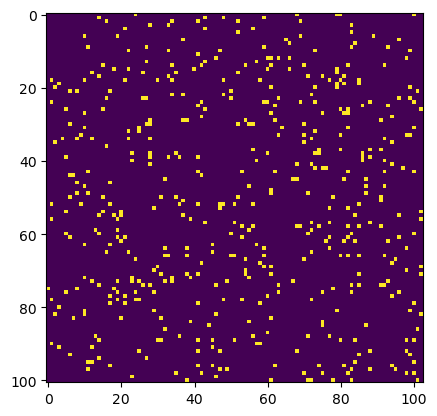

In [47]:
plt.imshow(img)
plt.show()

In [53]:
pos.shape

(500, 2)